In [1]:
import pandas as pd

In [2]:
pd.set_option("display.max_rows", 20)

### Read the file

In [3]:
data = pd.read_excel("bmtfiles/work.xlsx")

In [4]:
data.head()

,ExpertiseId,Element,Location,Damage,ImagePath
0,4565,pojazd,zew.,poglądowe,bmtfiles/photos/4565/20240909_101359222_md_ima...
1,4575,pojazd,zew.,poglądowe,bmtfiles/photos/4575/20240909_115602474_md_ima...
2,4561,pojazd,zew.,poglądowe,bmtfiles/photos/4561/photo.jpg
3,4554,pojazd,zew.,poglądowe,bmtfiles/photos/4554/photo.jpg
4,3359,pojazd,zew.,poglądowe,bmtfiles/photos/3359/photo.jpg


### Unique elements of car parts that can be analzed

In [5]:
data["Element"].unique()

array(['pojazd', 'maska silnika', 'drzwi', 'rura turbo', 'zderzak',
       'mata wygłuszenia silnika', 'błotnik', 'Naklejki ozdobne drzwi',
       'wnęka drzwi', 'szyba', 'wnętrze', 'lusterko', 'rama dachu',
       'nakładka zderzaka', 'uszczelka ramy dachu', 'lampa',
       'klapa bagażnika', 'klapka wlewu paliwa', 'nadwozie', 'dach',
       'podsufitka', 'listwa błotnika', 'felga', 'tapicerka fotel',
       'uchwyt holowniczy', 'próg', 'tapicerka kanapa', 'tapicerka',
       'elementy plastikowe', 'podnośnik', 'klamka drzwi', 'zaślepka',
       'półka bagażnika', 'zaślepka isofix', 'kratka wlotu powietrza',
       'reflektor/lampa', 'absorber', 'nakładka klapy bagażnika', 'opona',
       'kołpak', 'tapicerka bagażnik', 'listwa szyby drzwi',
       'listwa drzwi', 'dywaniki', 'antena', 'listwa', 'nadkole',
       'słupek', 'belka zderzaka', 'osłona silnika',
       'uszczelka podszybia', 'atrapa chłodnicy', 'wzmocnienie czołowe',
       'uszczelka wnęki drzwi', 'uszczelka szyby drzwi'

In [6]:
with pd.option_context('display.max_rows', None):
    print(data["Element"].value_counts())

Element
pojazd                                11810
nadwozie                               8982
zderzak                                4133
szyba                                  3625
tapicerka                              3549
drzwi                                  2737
dach                                   2251
lusterko                               1802
maska silnika                          1677
błotnik                                1660
wnętrze                                 960
wnęka drzwi                             953
klapa bagażnika                         900
elementy plastikowe                     805
nakładka zderzaka                       768
listwa błotnika                         574
felga                                   556
lampa                                   458
drzwi skrzydłowe                        411
próg                                    401
podsufitka                              400
rura turbo                              370
listwa drzwi            

In [7]:
ELEMENT = "zderzak"

In [8]:
filtered = data[data["Element"] == ELEMENT]

In [9]:
filtered.head()

,ExpertiseId,Element,Location,Damage,ImagePath
94,2165,zderzak,przód,uszkodzenie,bmtfiles/photos/2165/photo_(11).jpg
95,2165,zderzak,przód,uszkodzenie,bmtfiles/photos/2165/photo_(12).jpg
104,2165,zderzak,przód,uszkodzenie,bmtfiles/photos/2165/photo_(13).jpg
105,2165,zderzak,przód,uszkodzenie,bmtfiles/photos/2165/photo_(14).jpg
113,2165,zderzak,przód,rysa z uszkodz. lakieru,bmtfiles/photos/2165/photo_(15).jpg


### Types of damage

In [10]:
filtered["Damage"].value_counts()

Damage
rysa z uszkodz. lakieru      2755
ubytek lakieru                445
uszkodzenie                   393
rysy                          199
deformacja+ubytki lakieru      92
inne                           61
odprysk                        58
rysy + odpryski                54
zła jakość naprawy             20
wżery na lakierze              14
rysa do polerowania            14
odkształcony                   10
złuszczony lakier               7
źle spasowany                   4
odpryski - rant                 4
wada lakiernicza                3
Name: count, dtype: int64

### Get damage class

In [11]:
DAMAGE = "multiclass"

In [12]:
dmg_class = filtered[(filtered["Damage"] == "rysa z uszkodz. lakieru") | (filtered["Damage"] == "ubytek lakieru")]

In [13]:
dmg_class.shape

(3200, 5)

In [14]:
import os

os.makedirs("work_dataset", exist_ok=True)

dmg_class_file = f"work_dataset/{ELEMENT}_{DAMAGE}.csv"

dmg_class.to_csv(dmg_class_file)

### Read csv, extract filepaths and save photos to work_dataset

In [15]:
work_csv = pd.read_csv(dmg_class_file)

In [16]:
filepaths = work_csv["ImagePath"]

In [17]:
import shutil
from pathlib import Path

with pd.option_context('display.max_rows', None):
    workdir = Path(f"work_dataset/{ELEMENT}/{DAMAGE}/photos")
    workdir.mkdir(parents=True, exist_ok=True)

    for f in filepaths.values:
        src = Path(f)

        src_fldr = src.parts[-2]
        dest = workdir.joinpath(f"{src_fldr}_{src.name}")

        try: 
            shutil.copy(src, dest)
        except Exception as e:
            print(e)
            continue

[Errno 2] No such file or directory: 'bmtfiles/photos/10982/photo_(13).jpg'
[Errno 2] No such file or directory: 'bmtfiles/photos/10982/photo_(15).jpg'
[Errno 2] No such file or directory: 'bmtfiles/photos/10982/photo_(14).jpg'
[Errno 2] No such file or directory: 'bmtfiles/photos/12700/2025-06-10_13-37-50_(1).jpg'
[Errno 2] No such file or directory: 'bmtfiles/photos/12700/2025-06-10_13-37-51.jpg'
[Errno 2] No such file or directory: 'bmtfiles/photos/12700/2025-06-10_13-37-51_(1).jpg'
[Errno 2] No such file or directory: 'bmtfiles/photos/12700/2025-06-10_13-37-52.jpg'
[Errno 2] No such file or directory: 'bmtfiles/photos/12700/2025-06-10_13-37-53.jpg'
[Errno 2] No such file or directory: 'bmtfiles/photos/12700/2025-06-10_13-37-53_(1).jpg'
[Errno 2] No such file or directory: 'bmtfiles/photos/10991/2025-06-11_07-01-29.jpg'
[Errno 2] No such file or directory: 'bmtfiles/photos/10991/2025-06-11_07-01-31.jpg'
[Errno 2] No such file or directory: 'bmtfiles/photos/10991/2025-06-11_07-01-33.

In [18]:
# Difference between thoretically available files and physically copied ones:
loc = len(dmg_class)
lwd = len([n for n in os.listdir(workdir)])

print("number of files in classes: ", loc)
print("number of files copied: ", lwd)
print("Difference: ", loc - lwd)

number of files in classes:  3200
number of files copied:  3177
Difference:  23


### Check files

#### Delete no jpgs files

In [19]:
num_skipped = 0

for path in workdir.rglob("*"):
    with open(path, "rb") as file:
        is_jfif = b"JFIF" in file.peek(10)
    if not is_jfif:
        num_skipped += 1
        print(path)
        os.remove(path)



print("No JFIF file: ", num_skipped)


work_dataset/zderzak/multiclass/photos/1721_image_(23).
work_dataset/zderzak/multiclass/photos/1721_image_(29).
work_dataset/zderzak/multiclass/photos/2136_image_(15).
work_dataset/zderzak/multiclass/photos/1721_image_(33).
work_dataset/zderzak/multiclass/photos/4442_20240914_121716779_md_image.
work_dataset/zderzak/multiclass/photos/2136_image_(34).
work_dataset/zderzak/multiclass/photos/10550_2024-10-24_13-57-31_(2).jpg
work_dataset/zderzak/multiclass/photos/1721_image_(24).
work_dataset/zderzak/multiclass/photos/1927_20240914_093842675_md_image.
work_dataset/zderzak/multiclass/photos/2136_image_(33).
work_dataset/zderzak/multiclass/photos/4442_20240914_121715537_md_image.
work_dataset/zderzak/multiclass/photos/2136_image_(16).
work_dataset/zderzak/multiclass/photos/1721_image_(30).
work_dataset/zderzak/multiclass/photos/4442_20240914_121714978_md_image.
work_dataset/zderzak/multiclass/photos/4442_20240914_121716204_md_image.
work_dataset/zderzak/multiclass/photos/4442_20240914_12171

#### Are all files proper jpgs?


In [20]:
import fnmatch

jpgs = [path for path in workdir.rglob("*.jp*g", case_sensitive=False)]

not_jpgs_files = [f for f in workdir.rglob("*") if not fnmatch.fnmatch(f.name, '*.jp*g')]

num_jpgs = len(jpgs)

print("Number of *.jpg: ", num_jpgs)
print("Number of not *.jpg: ", len(not_jpgs_files))
print("Difference between workidr and counted jpgs: ", lwd - num_jpgs)

Number of *.jpg:  3101
Number of not *.jpg:  43
Difference between workidr and counted jpgs:  76


In [21]:
# Add proper suffixes

for f in not_jpgs_files:
    print(f)
    os.rename(f, f.with_suffix(".jpg"))

work_dataset/zderzak/multiclass/photos/2193_20240911_132721919_md_image.
work_dataset/zderzak/multiclass/photos/4504_20240913_151632128_md_image.
work_dataset/zderzak/multiclass/photos/4430_20240912_095313198_md_image.
work_dataset/zderzak/multiclass/photos/4504_20240913_151638855_md_image.
work_dataset/zderzak/multiclass/photos/2193_20240911_132654162_md_image.
work_dataset/zderzak/multiclass/photos/1803_20240912_160225373_md_image.
work_dataset/zderzak/multiclass/photos/2193_20240911_132724134_md_image.
work_dataset/zderzak/multiclass/photos/4443_20240913_091010820_md_image.
work_dataset/zderzak/multiclass/photos/4439_20240913_131759739_md_image.
work_dataset/zderzak/multiclass/photos/1803_20240912_160223036_md_image.
work_dataset/zderzak/multiclass/photos/4504_20240913_151636924_md_image.
work_dataset/zderzak/multiclass/photos/4443_20240913_090959618_md_image.
work_dataset/zderzak/multiclass/photos/4439_20240913_131811266_md_image.
work_dataset/zderzak/multiclass/photos/1803_2024091

In [22]:
jpgs = [path for path in workdir.rglob("*.jp*g", case_sensitive=False)]
not_jpgs_files = [f for f in workdir.rglob("*") if not fnmatch.fnmatch(f.name, '*.jp*g')]

print("Number of *.jpg: ", len(jpgs))
print("Number of not *.jpg: ", len(not_jpgs_files))

Number of *.jpg:  3144
Number of not *.jpg:  0


In [23]:
import PIL.Image
from fractions import Fraction
from collections import Counter

sizes_dict = Counter()
ratio_dict = Counter()

for j in jpgs:
    img = PIL.Image.open(j)
    w, h = img.size
    img_size = (w,h)
    sizes_dict[img_size] += 1
    ratio = Fraction(w, h).as_integer_ratio()
    ratio_dict[ratio] += 1 

In [24]:
for k, v in sizes_dict.items():
    print(f"{k}: {v}")

(2560, 1440): 2859
(2400, 1350): 116
(1920, 1080): 63
(3840, 2160): 99
(1080, 1920): 3
(4000, 3000): 1
(4080, 3060): 1
(8192, 3686): 2


In [25]:
for k, v in ratio_dict.items():
    print(f"{k}: {v}")

(16, 9): 3137
(9, 16): 3
(4, 3): 2
(4096, 1843): 2


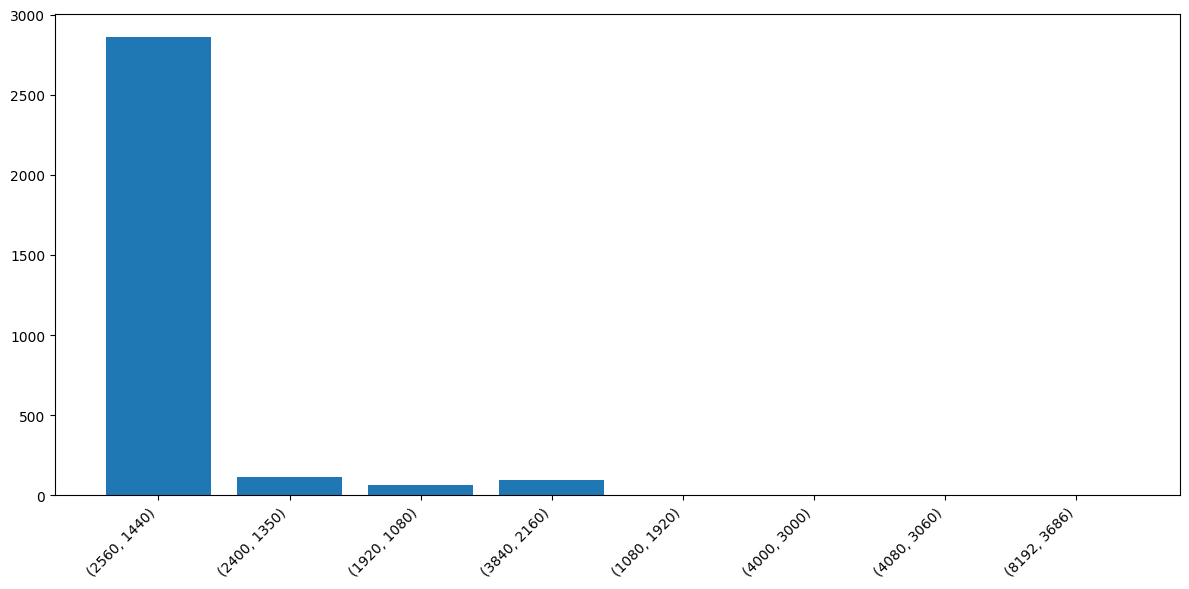

In [26]:
import matplotlib.pyplot as plt

x, y = zip(*[(str(k), v) for k, v in sizes_dict.items()])
plt.figure(figsize=(12, 6))  # Increase figure size if needed
plt.bar(x, y)
plt.xticks(rotation=45, ha='right')  # Rotate labels and align right
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()